### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
# Keras and Tensorflow >2.0
# pip install tensorflow==2.0.0 keras
import tensorflow as tf
from tensorflow import keras


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
### Data Collection
# pip install pandas_datareader
# !pip install pandas_datareader



In [3]:
import pandas_datareader as pdr
key = "5206d6275b8e7755c359b9c1687db45dbed7bf09"


In [4]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

/tmp/ipykernel_29/1593133401.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key=key)


In [5]:
df.to_csv(r'K:\IITK\PROJECTS\stock prediction analysis kn\AAPL.csv')

In [6]:
import pandas as pd

In [7]:
df=pd.read_csv(r'K:\IITK\PROJECTS\stock prediction analysis kn\AAPL.csv')

In [8]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-08-20 00:00:00+00:00,215.46,219.18,215.11,218.10,30287695,51.584538,52.475165,51.500742,52.216596,121150780,0.0,1.0
1,AAPL,2018-08-21 00:00:00+00:00,215.04,217.19,214.03,216.80,26159755,51.483983,51.998727,51.242173,51.905355,104639020,0.0,1.0
2,AAPL,2018-08-22 00:00:00+00:00,215.05,216.36,213.84,214.10,19018131,51.486377,51.800012,51.196684,51.258932,76072524,0.0,1.0
3,AAPL,2018-08-23 00:00:00+00:00,215.49,217.05,214.60,214.65,18883224,51.591720,51.965209,51.378640,51.390611,75532896,0.0,1.0
4,AAPL,2018-08-24 00:00:00+00:00,216.16,216.90,215.11,216.60,18476356,51.752129,51.929297,51.500742,51.857472,73905424,0.0,1.0


In [9]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1251,AAPL,2023-08-10 00:00:00+00:00,177.97,180.75,177.600,179.48,54686851,177.730081,180.506333,177.36058,179.238045,54686851,0.00,1.0
1252,AAPL,2023-08-11 00:00:00+00:00,177.79,178.62,176.550,177.32,52036672,177.790000,178.620000,176.55000,177.320000,52036672,0.24,1.0
1253,AAPL,2023-08-14 00:00:00+00:00,179.46,179.69,177.305,177.97,43675627,179.460000,179.690000,177.30500,177.970000,43675627,0.00,1.0
1254,AAPL,2023-08-15 00:00:00+00:00,177.45,179.48,177.050,178.88,43622593,177.450000,179.480000,177.05000,178.880000,43622593,0.00,1.0
1255,AAPL,2023-08-16 00:00:00+00:00,176.57,178.54,176.500,177.13,46964857,176.570000,178.540000,176.50000,177.130000,46964857,0.00,1.0


In [10]:
df1=df.reset_index()['close']

In [11]:
df1

0       215.46
1       215.04
2       215.05
3       215.49
4       216.16
         ...  
1251    177.97
1252    177.79
1253    179.46
1254    177.45
1255    176.57
Name: close, Length: 1256, dtype: float64

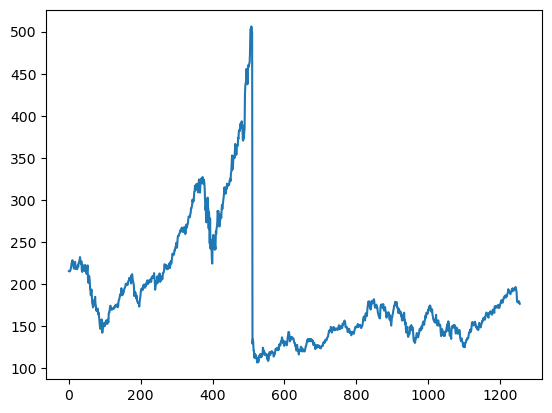

In [12]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [13]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [14]:
import numpy as np

In [15]:
df1

0       215.46
1       215.04
2       215.05
3       215.49
4       216.16
         ...  
1251    177.97
1252    177.79
1253    179.46
1254    177.45
1255    176.57
Name: close, Length: 1256, dtype: float64

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [17]:
df1

array([[0.27206011],
       [0.27100814],
       [0.27103319],
       ...,
       [0.18189105],
       [0.17685661],
       [0.17465247]])

In [18]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [19]:
# training_size,test_size
train_data.shape

(816, 1)

train_data

In [20]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [21]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [22]:
print(X_train.shape), print(y_train.shape)

(715, 100)
(715,)


(None, None)

In [23]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [24]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [25]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [26]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 13s 133ms/step - loss: 0.0287 - val_loss: 5.9279e-04
Epoch 2/100
12/12 [==============================] - 0s 26ms/step - loss: 0.0119 - val_loss: 0.0019
Epoch 3/100
12/12 [==============================] - 0s 20ms/step - loss: 0.0110 - val_loss: 0.0013
Epoch 4/100
12/12 [==============================] - 0s 20ms/step - loss: 0.0111 - val_loss: 3.6636e-04
Epoch 5/100
12/12 [==============================] - 0s 19ms/step - loss: 0.0087 - val_loss: 3.4688e-04
Epoch 6/100
12/12 [==============================] - 0s 19ms/step - loss: 0.0072 - val_loss: 7.8055e-04
Epoch 7/100
12/12 [==============================] - 0s 20ms/step - loss: 0.0077 - val_loss: 0.0010
Epoch 8/100
12/12 [==============================] - 0s 23ms/step - loss: 0.0075 - val_loss: 3.0032e-04
Epoch 9/100
12/12 [==============================] - 0s 19ms/step - loss: 0.0061 - val_loss: 2.8972e-04
Epoch 10/100
12/12 [==============================] - 0s 20ms/step - loss:

In [30]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 8ms/step


In [31]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [32]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

221.31999562019553

In [33]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

156.7821036491823

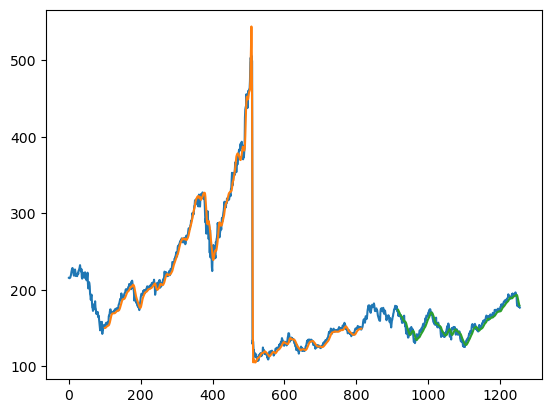

In [34]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [35]:
len(test_data)

440

In [36]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape


(1, 100)

In [37]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [38]:
temp_input

[0.13377582968065116,
 0.12884157795867246,
 0.12726361928616153,
 0.13507827175954912,
 0.13906073888541015,
 0.1454226675015654,
 0.14860363180964303,
 0.14725109580463364,
 0.14256731371321218,
 0.14482154038822787,
 0.13823418910457103,
 0.13515341264871633,
 0.1334001252348152,
 0.14707576706324355,
 0.14619912335629304,
 0.14624921728240442,
 0.14935504070131495,
 0.15226048841577955,
 0.14980588603631806,
 0.14572323105823415,
 0.14649968691296178,
 0.14259236067626796,
 0.14256731371321218,
 0.15421415153412643,
 0.15739511584220411,
 0.15716969317470253,
 0.1545397620538509,
 0.15180964308077638,
 0.1476518472135253,
 0.16713838447088286,
 0.16696305572949277,
 0.16262993112085156,
 0.16710081402629928,
 0.16758922980588598,
 0.16463368816530988,
 0.1633813400125234,
 0.1633813400125234,
 0.16493425172197868,
 0.17084533500313087,
 0.17112085159674384,
 0.1687163431433938,
 0.16210394489668123,
 0.16280525986224165,
 0.1656856606136506,
 0.17179711959924854,
 0.17648090169067,

In [39]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.17685097]
101
1 day input [0.12884158 0.12726362 0.13507827 0.13906074 0.14542267 0.14860363
 0.1472511  0.14256731 0.14482154 0.13823419 0.13515341 0.13340013
 0.14707577 0.14619912 0.14624922 0.14935504 0.15226049 0.14980589
 0.14572323 0.14649969 0.14259236 0.14256731 0.15421415 0.15739512
 0.15716969 0.15453976 0.15180964 0.14765185 0.16713838 0.16696306
 0.16262993 0.16710081 0.16758923 0.16463369 0.16338134 0.16338134
 0.16493425 0.17084534 0.17112085 0.16871634 0.16210394 0.16280526
 0.16568566 0.17179712 0.1764809  0.17635567 0.183469   0.18562304
 0.18219161 0.18126487 0.17778334 0.18467126 0.18564809 0.19273638
 0.19153413 0.19313713 0.19829681 0.19556669 0.19579211 0.19316218
 0.20077646 0.19997495 0.19644333 0.20343143 0.20641202 0.20726362
 0.21823419 0.2144521  0.21162179 0.21282405 0.20999374 0.20480902
 0.20348153 0.20771446 0.20964308 0.21001879 0.21828428 0.21763306
 0.2210645  0.21613024 0.21314966 0.21517846 0.21735755 0.21956168
 0.21635567 0.22289292 0.22444584

In [40]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [41]:
import matplotlib.pyplot as plt

In [42]:
len(df1)

1256

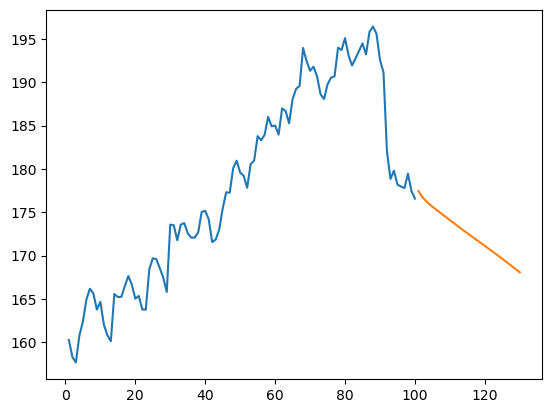

In [43]:
plt.plot(day_new,scaler.inverse_transform(df1[1156:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

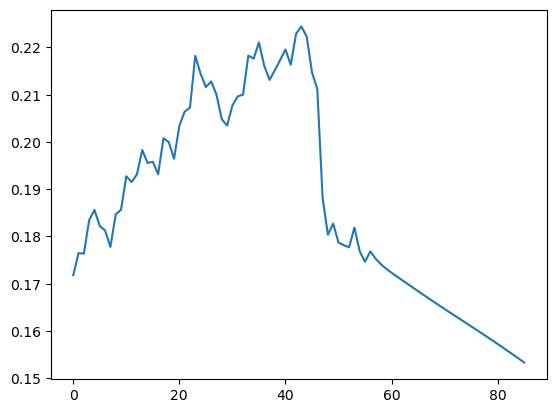

In [44]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [45]:
df3=scaler.inverse_transform(df3).tolist()

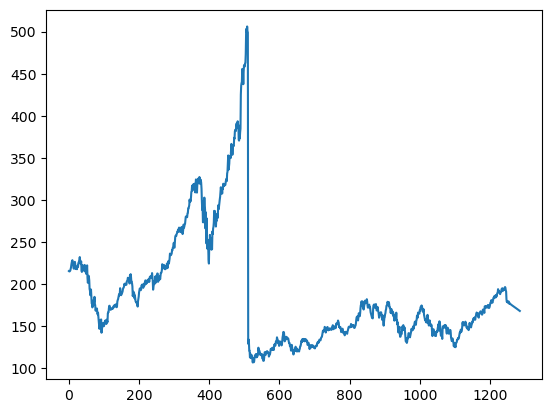

In [46]:
plt.plot(df3)

In [47]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-08-20 00:00:00+00:00,215.46,219.18,215.11,218.10,30287695,51.584538,52.475165,51.500742,52.216596,121150780,0.0,1.0
1,AAPL,2018-08-21 00:00:00+00:00,215.04,217.19,214.03,216.80,26159755,51.483983,51.998727,51.242173,51.905355,104639020,0.0,1.0
2,AAPL,2018-08-22 00:00:00+00:00,215.05,216.36,213.84,214.10,19018131,51.486377,51.800012,51.196684,51.258932,76072524,0.0,1.0
3,AAPL,2018-08-23 00:00:00+00:00,215.49,217.05,214.60,214.65,18883224,51.591720,51.965209,51.378640,51.390611,75532896,0.0,1.0
4,AAPL,2018-08-24 00:00:00+00:00,216.16,216.90,215.11,216.60,18476356,51.752129,51.929297,51.500742,51.857472,73905424,0.0,1.0


In [51]:
# df = df[['close']].copy()

In [48]:
# df.describe()

In [49]:
# from statsmodels.tsa.stattools import adfuller
# result = adfuller(df.close.dropna())
# print(f"ADF Statistic: {result[0]}")
# print(f"p-value: {result[1]}")

**Autocorelation Function(ACF)**

In [50]:
# from statsmodels.graphics.tsaplots import plot_acf

In [51]:
# import matplotlib.pyplot as plt

In [52]:
# fig, (ax1,ax2) = plot.subplots(1,2, figsize=(16,4))
# ax1.plot(df.close)
# ax1.set_title("Original")

# plot_acf(df.close, ax = ax2);

NameError: name 'plot' is not defined

In [50]:
# import matplotlib.pyplot as plt
# import pandas as pd  # Assuming you're working with pandas DataFrame

# # Assuming you have a DataFrame named 'df' with a 'close' column
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
# ax1.plot(df.close)
# ax1.set_title("Original")

# pd.plotting.autocorrelation_plot(df.close, ax=ax2)
# ax2.set_title("Autocorrelation")

# plt.tight_layout()
# plt.show()


In [61]:
import numpy as np,pandas as pd,matplotlib as plt
import math
import statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error ,mean_absolute_error

SyntaxError: invalid syntax (908375120.py, line 3)

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA  # Corrected import

from sklearn.metrics import mean_squared_error, mean_absolute_error


In [64]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-08-20 00:00:00+00:00,215.46,219.18,215.11,218.10,30287695,51.584538,52.475165,51.500742,52.216596,121150780,0.0,1.0
1,AAPL,2018-08-21 00:00:00+00:00,215.04,217.19,214.03,216.80,26159755,51.483983,51.998727,51.242173,51.905355,104639020,0.0,1.0
2,AAPL,2018-08-22 00:00:00+00:00,215.05,216.36,213.84,214.10,19018131,51.486377,51.800012,51.196684,51.258932,76072524,0.0,1.0
3,AAPL,2018-08-23 00:00:00+00:00,215.49,217.05,214.60,214.65,18883224,51.591720,51.965209,51.378640,51.390611,75532896,0.0,1.0
4,AAPL,2018-08-24 00:00:00+00:00,216.16,216.90,215.11,216.60,18476356,51.752129,51.929297,51.500742,51.857472,73905424,0.0,1.0


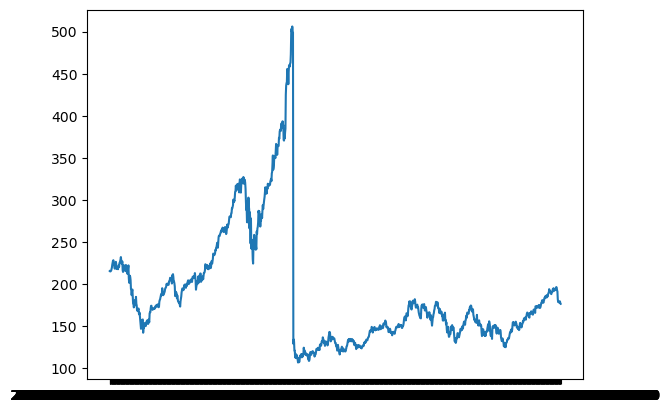

In [66]:
plt.plot(df['date'],df['close'])
plt.show()

In [72]:
to_row = int(len(df)*0.9)
training_data = list(df[0:to_row]['close'])
testing_data = list(df[to_row:]['close'])
# training_data

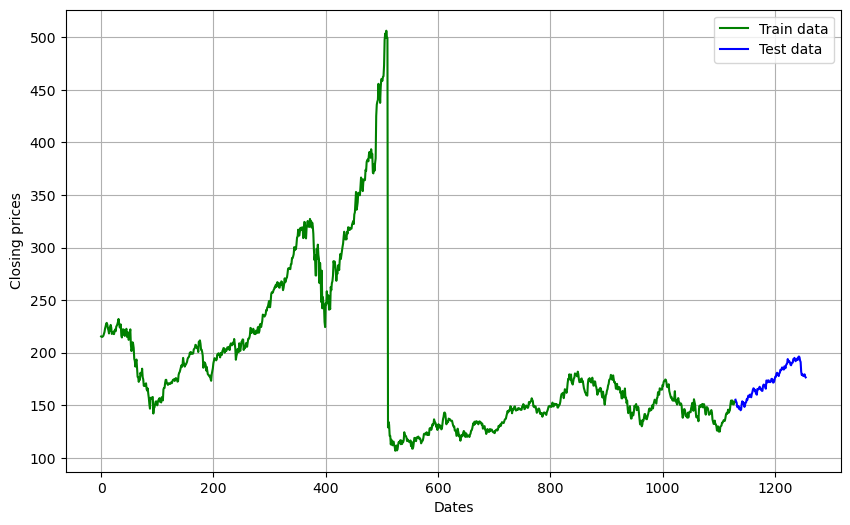

In [73]:
plt.figure(figsize =(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing prices')
plt.plot(df[0:to_row]['close'],'green',label = 'Train data')
plt.plot(df[to_row:]['close'],'blue',label = 'Test data')
plt.legend()

In [143]:
len(training_data),len(testing_data),len(df)*0.9

(1403, 126, 1130.4)

In [74]:
model_predictions = []
n_test_obser = len(testing_data)

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA as new_ARIMA  # Import the new ARIMA class

from sklearn.metrics import mean_squared_error, mean_absolute_error




In [157]:
model_predictions = []

for i in range(n_test_obser):
    model = statsmodels.tsa.arima.model.ARIMA(training_data, order=(4, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    
    # Update training_data with actual test value without appending to it
    actual_test_value = testing_data[i]
    training_data[-1] = actual_test_value  # Update the last element of training_data



In [158]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1403
Model:                 ARIMA(4, 1, 0)   Log Likelihood               -5322.406
Date:                Thu, 17 Aug 2023   AIC                          10654.812
Time:                        13:35:46   BIC                          10681.040
Sample:                             0   HQIC                         10664.616
                               - 1403                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0299      0.043     -0.697      0.486      -0.114       0.054
ar.L2          0.0289      0.034      0.839      0.401      -0.039       0.096
ar.L3          0.0102      0.040      0.254      0.8

In [153]:
len(model_predictions), len(testing_data)

(126, 126)

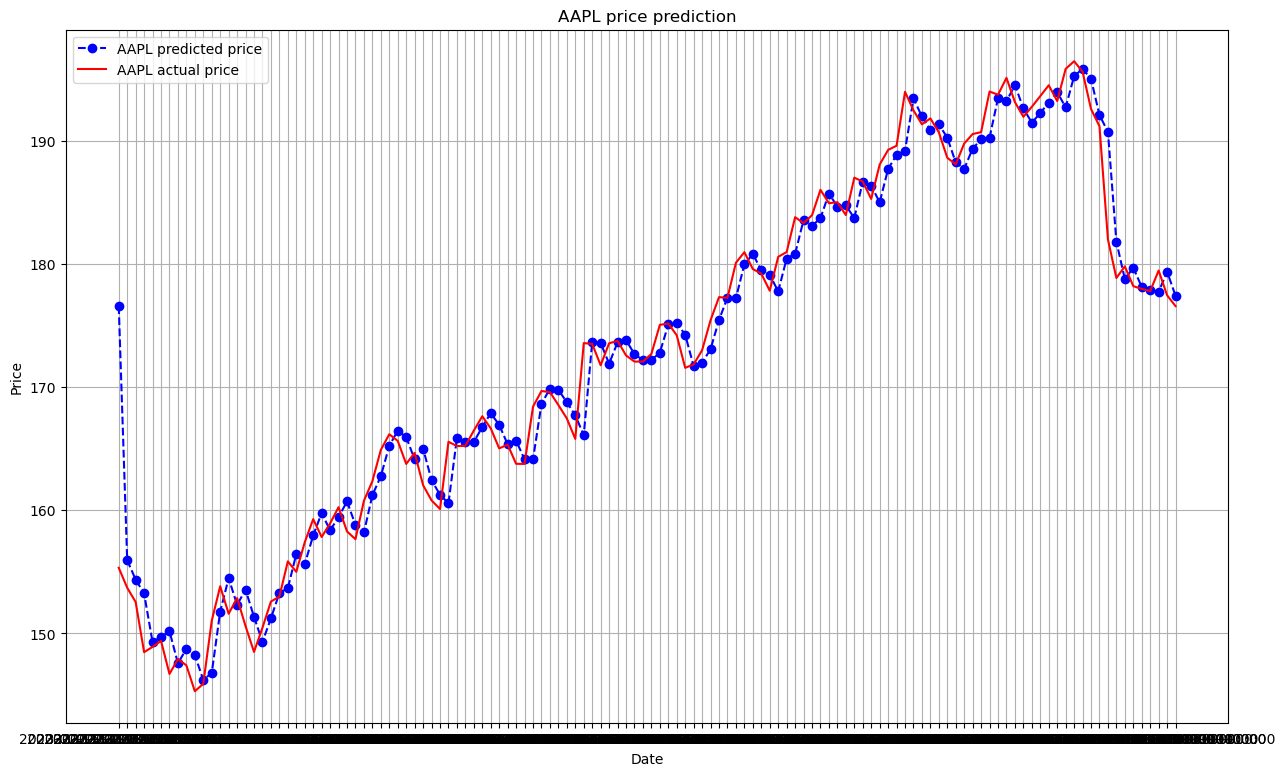

In [155]:
plt.figure(figsize = (15,9))
plt.grid(True)
date_range = df[to_row:].date
plt.plot(date_range, model_predictions, color = 'blue', marker = 'o', linestyle = 'dashed', label ='AAPL predicted price')
plt.plot(date_range,testing_data, color = 'red', label ='AAPL actual price')
plt.title('AAPL price prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [156]:
mape = np.mean(np.abs(np.array(model_predictions) - np.array(testing_data))/np.abs(testing_data))
print('MAPE: '+ str(mape))

MAPE: 0.01018644815834362


In [144]:
n_test_obser

126

In [148]:
# from statsmodels.tsa.arima.model import ARIMA
# for i in range(n_test_obser):
#     model = ARIMA(training_data,  order =(4,1,0))
#     model_fit = model.fit()
#     output = model_fit.forecast()
#     yhat = output[0]
#     model_predictions.append(yhat)
#     actual_test_value = testing_data[i]
#     training_data.append( actual_test_value)
# #     print(output)
# #     break
# print(model_fit.summary())

In [145]:
from statsmodels.tsa.arima.model import ARIMA

model_predictions = []

for i in range(n_test_obser):
    model = ARIMA(training_data, order=(4, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    
    # Update training_data with actual test value without appending to it
    actual_test_value = testing_data[i]
    training_data[-1] = actual_test_value  # Update the last element of training_data

# Now model_predictions and training_data should have the same length
print(len(model_predictions))
print(len(training_data))

# Print model summary after the loop
print(model_fit.summary())


126
1403
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1403
Model:                 ARIMA(4, 1, 0)   Log Likelihood               -5322.406
Date:                Thu, 17 Aug 2023   AIC                          10654.812
Time:                        13:29:28   BIC                          10681.040
Sample:                             0   HQIC                         10664.616
                               - 1403                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0299      0.043     -0.697      0.486      -0.114       0.054
ar.L2          0.0289      0.034      0.839      0.401      -0.039       0.096
ar.L3          0.0102      0.040      0.254

In [146]:
len(model_predictions) , len(testing_data)

(126, 126)

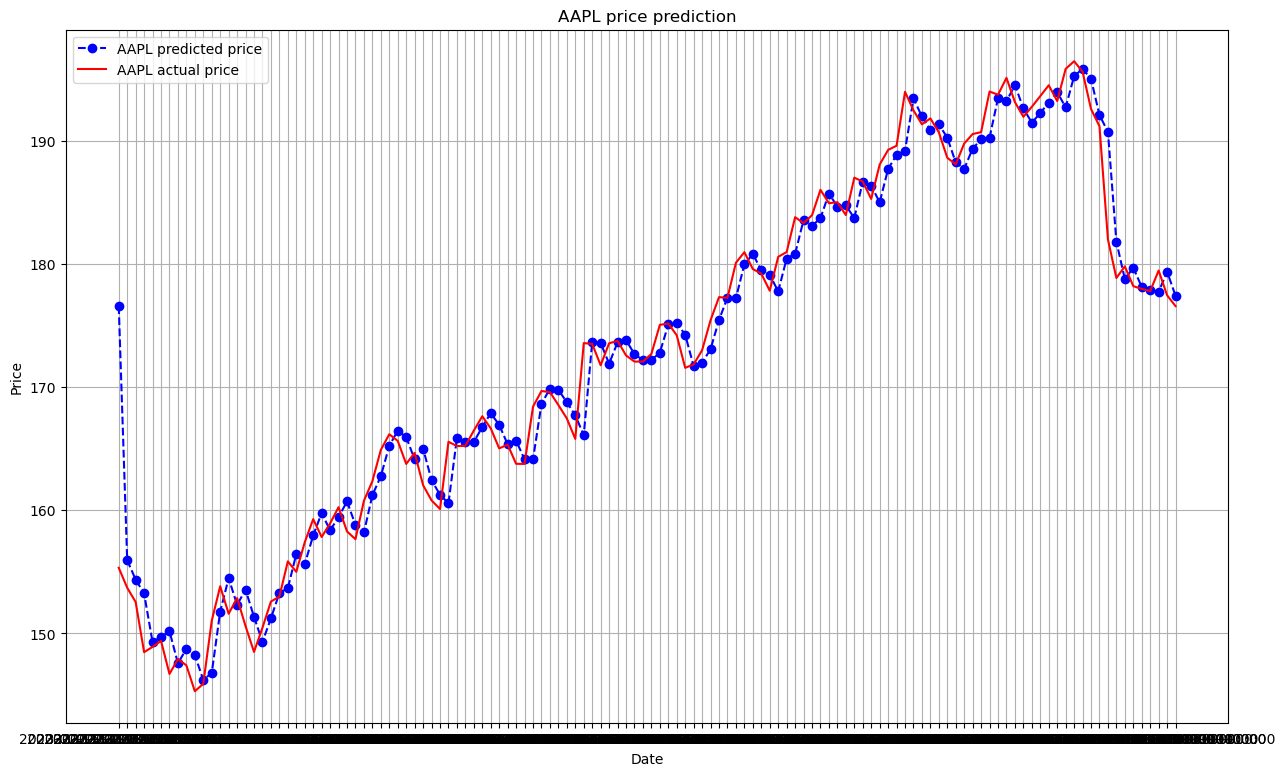

In [147]:
plt.figure(figsize = (15,9))
plt.grid(True)
date_range = df[to_row:].date
plt.plot(date_range, model_predictions[:], color = 'blue', marker = 'o', linestyle = 'dashed', label ='AAPL predicted price')
plt.plot(date_range,testing_data, color = 'red', label ='AAPL actual price')
plt.title('AAPL price prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [149]:
mape = np.mean(np.abs(np.array(model_predictions) - np.array(testing_data))/np.abs(testing_data))
print('MAPE: '+ str(mape))

MAPE: 0.01018644815834362
